In [2]:
#!pip install ipywidgets

In [5]:
#!pip install pyreadstat

  Obtaining dependency information for pyreadstat from https://files.pythonhosted.org/packages/82/cc/519ee6307f25e40a349cc1cef730b9b47bf7ef81a94f9b14afcc7d058374/pyreadstat-1.2.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.4 MB/s eta 0:00:00:00:0100:01


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
# read from SPSS file
spss_df = pd.read_spss('P15644_20220301.sav')
spss_df.head(5)

,panelid_2,Panel_PSU,Panel_Strata,Jun21_WeightBoost,Jun21_IntDate,Jun21_IntMode,ff_disact,Cur_GOR,cur_urbrurew,cur_urbrurs,...,FoodShopModePreCov,FoodTimePreCov,EconAct,WorkTime,WFH,CommuteMode,CommuteTime,FoodShopMode,FoodTime,Health
0,109050.0,11801864.0,9.0,1.210115,1.384271e+10,Web,No,South West,Urban,NaN,...,Driving a car or van,15.0,In full-time education (including on vacation),NaN,NaN,Studied from home,NaN,On foot,20.0,Very good
1,118890.0,11802264.0,11.0,0.904141,1.384272e+10,Web,Yes - does not affect day-to-day life,Scotland,NaN,Rural,...,"Bus, minibus, or coach",40.0,In paid work (or away temporarily) for at leas...,37.0,Worked entirely at home,NaN,NaN,"Bus, minibus, or coach",40.0,Bad
2,107526.0,11801455.0,2.0,0.385493,1.384308e+10,Web,No,North West,Urban,NaN,...,On foot,35.0,Wholly retired from work,NaN,NaN,NaN,NaN,On foot,35.0,Very good
3,114038.0,11900960.0,8.0,0.316471,1.384376e+10,Phone,No,South East,Rural,NaN,...,Driving a car or van,30.0,In paid work (or away temporarily) for at leas...,NaN,Worked equally at home and outside home,On foot,15.0,Driving a car or van,30.0,Very good
4,112090.0,11900561.0,9.0,0.273876,1.384309e+10,Web,No,South West,Rural,NaN,...,NaN,NaN,Doing something else,NaN,NaN,NaN,NaN,Driving a car or van,25.0,Good


In [8]:
import pandas as pd

raw_df = pd.read_csv('P15644.csv')

# set display full table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [71]:
import ipywidgets as widgets
from IPython.display import display


def run_code_block_1():
    global ori_df, raw_df

    ori_df = raw_df.copy()
    sex = 2 # 1-Male, 2-Female
    
    ori_df = ori_df[ori_df['Cur_Sex']==sex] 
    print('Select sex type',sex)
    # ori_df = ori_df[ori_df['Cur_Sex']==2]

def run_code_block_2():
    global ori_df, raw_df
    
    ori_df = raw_df.copy()
    age_cat_list = [3,4,5,6] # 1:18-29, 2:30-39, 3:40-49, 4:50-59, 5:60-69, 6:70+
    ori_df = ori_df[ori_df['Cur_AgeCat'].isin(age_cat_list)] 
    print('Select age range',age_cat_list)
    
def run_code_block_3():
    global ori_df, raw_df
    
    ori_df = raw_df.copy()
    income_list = [1,2,3] # 1:0-1000, 2:1001-1500, 3:1501-2500, 4:2500+ (monthly)
    ori_df = ori_df[ori_df['Cur_HHIncomeEquiv4_21_Imputed'].isin(income_list)] 
    print('Select income',income_list)
    
def run_code_block_4():
    global ori_df, raw_df
    ori_df = raw_df.copy()
    print('Reset/All categories and values')

# Creating Buttons
button1 = widgets.Button(description="Select sex")
button2 = widgets.Button(description="Select age")
button3 = widgets.Button(description="Select income level")
button4 = widgets.Button(description="Reset/All categories and values")

# Define the button click event
def on_button1_clicked(b):
    run_code_block_1()

def on_button2_clicked(b):
    run_code_block_2()
    
def on_button3_clicked(b):
    run_code_block_3()
    
def on_button4_clicked(b):
    run_code_block_4()

# Bind click event to buttons
button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)
button3.on_click(on_button3_clicked)
button4.on_click(on_button4_clicked)

# Show Buttons/ choose buttons and run below
display(button1)
display(button2)
display(button3)
display(button4)

Button(description='Select sex', style=ButtonStyle())

Button(description='Select age', style=ButtonStyle())

Button(description='Select income level', style=ButtonStyle())

Button(description='Reset/All categories and values', style=ButtonStyle())

## 1. Data cleaning

#### Housing Cost to Income

In [12]:
global ori_df

# 98 rows have both mortcost and rentcost as null (差不多一半是全款买房，所以租金和房贷都是空值)ori_df
ori_df['MortCost']  =ori_df['MortCost'].fillna(0)
ori_df['RentCost']  =ori_df['RentCost'].fillna(0)
ori_df['HousingCost'] =ori_df['MortCost'] +ori_df['RentCost'] # Monthly

In [13]:
# drop nan value
print(ori_df['Cur_HHIncomeEquiv4_21_Imputed'].isnull().sum())
ori_df = ori_df.dropna(subset=['Cur_HHIncomeEquiv4_21_Imputed'])

133


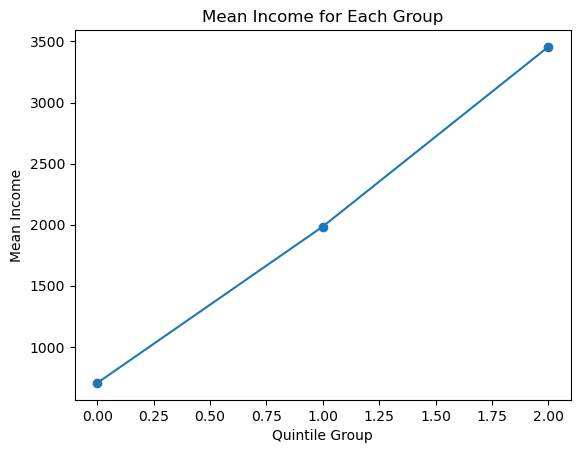

In [72]:
plt.plot([0,1,2], new_mean_group[:3], marker='o')
plt.xlabel('Quintile Group')
plt.ylabel('Mean Income')
plt.title('Mean Income for Each Group')
plt.show()

In [14]:
mean_group = [500, 1250, 2000, 3000]
new_mean_group = list(map(lambda x:((x[1]+x[0])/2), [[0,1410],[1410,2560],[2560, 4350]]))
new_mean_group.append(5115.0)
print(new_mean_group)

[705.0, 1985.0, 3455.0, 5115.0]


In [16]:
ori_df['Cur_HHIncome4_21_real_value'] =ori_df['Cur_HHIncome4_21_Imputed'].apply(lambda x: new_mean_group[int(x)-1])
ori_df['HousingCostToIncome'] = ori_df['HousingCost'] / ori_df['Cur_HHIncome4_21_real_value']

In [17]:
ori_df[ori_df['HousingCostToIncome'] > 1].head(5)

,panelid_2,Panel_PSU,Panel_Strata,Jun21_WeightBoost,Jun21_IntDate,Jun21_IntMode,ff_disact,Cur_GOR,cur_urbrurew,cur_urbrurs,Cur_Sex,Cur_RClassGp,Cur_AgeCat,Cur_HEdQual,Cur_RelStat5,Cur_HHSize5,Cur_HHChild,Cur_HHType,Cur_SubjInc,Cur_HHIncome4_21,Cur_HHIncome4_21_Imputed,Cur_HHIncomeEquiv4_21,Cur_HHIncomeEquiv4_21_Imputed,Cur_IdentClass,Cur_PartyID5,Cur_Ethnic6,Cur_IntUse3,Tenure,MortCost,RentCost,CvBedRoom,HomeProb01,HomeProb02,HomeProb03,HomeProb04,HomeProb05,HomeProb06,HomeProb07,HomeProb08,HomeProb09,HomeProb10,HomeProb11,HomeProb12,HomeProb13,HomeProb14,HomeProb15,HomeProb16,HomeProb17,HomeProb_Oth,NeighQual_CrimeSafety_q,NeighQual_TrafficSafety_q,NeighQual_FoodStores_q,NeighQual_AccessPubTrans_q,NeighQual_AccessSocCult_q,NeighQual_AccessRetail_q,NeighQual_AccessRec_q,NeighQual_EaseWalk_q,NeighQual_EaseCycle_q,NeighQual_OutdoorPlay_q,NeighQual_QualitySchools_q,NeighQual_NeighbourSoc_q,MovHom,EconActPreCov1,EconActPreCov2,EconActPreCov3,EconActPreCov4,EconActPreCov5,WorkTimePreCov,WFHPreCov,CommuteModePreCov,CommuteTimePreCov,FoodShopModePreCov,FoodTimePreCov,EconAct,WorkTime,WFH,CommuteMode,CommuteTime,FoodShopMode,FoodTime,Health,HousingCost,Cur_HHIncome4_21_real_value,HousingCostToIncome
17,112901.0,11800439.0,4.0,2.157926,1.384348e+10,Web,3.0,2.0,1.0,NaN,2.0,5.0,3.0,2.0,5.0,2.0,2.0,3.0,5.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,10.0,0.0,1000.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,5.0,5.0,5.0,2.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,60.0,5.0,1.0,90.0,9.0,90.0,3.0,37.0,5.0,9.0,30.0,9.0,90.0,4.0,1000.0,705.0,1.418440
23,103573.0,11502502.0,7.0,0.290508,1.384393e+10,Web,3.0,7.0,1.0,NaN,2.0,3.0,5.0,1.0,3.0,1.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,10.0,0.0,880.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,1.0,3.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,50.0,5.0,1.0,45.0,8.0,10.0,5.0,NaN,NaN,NaN,NaN,8.0,45.0,2.0,880.0,705.0,1.248227
24,101866.0,11800514.0,5.0,5.172297,1.384383e+10,Web,3.0,5.0,1.0,NaN,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,1.0,10.0,0.0,900.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,3.0,1.0,5.0,4.0,5.0,2.0,4.0,5.0,5.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,37.0,5.0,9.0,30.0,6.0,20.0,3.0,37.0,1.0,NaN,NaN,6.0,40.0,1.0,900.0,705.0,1.276596
26,119064.0,12001155.0,7.0,1.083894,1.384304e+10,Web,3.0,7.0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,4.0,NaN,4.0,5.0,NaN,1.0,NaN,1.0,2.0,2.0,4.0,2.0,10.0,0.0,1300.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,30.0,5.0,NaN,NaN,NaN,NaN,3.0,35.0,3.0,1300.0,705.0,1.843972
28,112800.0,12000788.0,6.0,1.051764,1.384281e+10,Web,3.0,6.0,1.0,NaN,1.0,1.0,1.0,3.0,5.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,10.0,0.0,850.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,3.0,4.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,30.0,5.0,9.0,20.0,9.0,30.0,3.0,28.0,5.0,9.0,20.0,9.0,30.0,3.0,850.0,705.0,1.205674


#### Home Problem

In [18]:
# define 'HomeProbTotal' as the sum of 'HomeProb01' to 'HomeProb14'
ori_df['HomeProbTotal'] = ori_df.loc[:, 'HomeProb01':'HomeProb14'].sum(axis=1)

#### Neighbor Quality

In [19]:
# drop nan value (80 missing values)
ori_df = ori_df.dropna(subset=['NeighQual_CrimeSafety_q', 'NeighQual_TrafficSafety_q', 'NeighQual_FoodStores_q',
       'NeighQual_AccessPubTrans_q', 'NeighQual_AccessSocCult_q',
       'NeighQual_AccessRetail_q', 'NeighQual_AccessRec_q',
       'NeighQual_EaseWalk_q', 'NeighQual_EaseCycle_q',
       'NeighQual_OutdoorPlay_q', 'NeighQual_QualitySchools_q',
       'NeighQual_NeighbourSoc_q'])

print(ori_df.loc[:, 'NeighQual_CrimeSafety_q':'NeighQual_NeighbourSoc_q'].isnull().sum())

ori_df['NeighQualTotal'] = ori_df.loc[:, 'NeighQual_CrimeSafety_q':'NeighQual_NeighbourSoc_q'].sum(axis=1)

NeighQual_CrimeSafety_q       0
NeighQual_TrafficSafety_q     0
NeighQual_FoodStores_q        0
NeighQual_AccessPubTrans_q    0
NeighQual_AccessSocCult_q     0
NeighQual_AccessRetail_q      0
NeighQual_AccessRec_q         0
NeighQual_EaseWalk_q          0
NeighQual_EaseCycle_q         0
NeighQual_OutdoorPlay_q       0
NeighQual_QualitySchools_q    0
NeighQual_NeighbourSoc_q      0
dtype: int64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

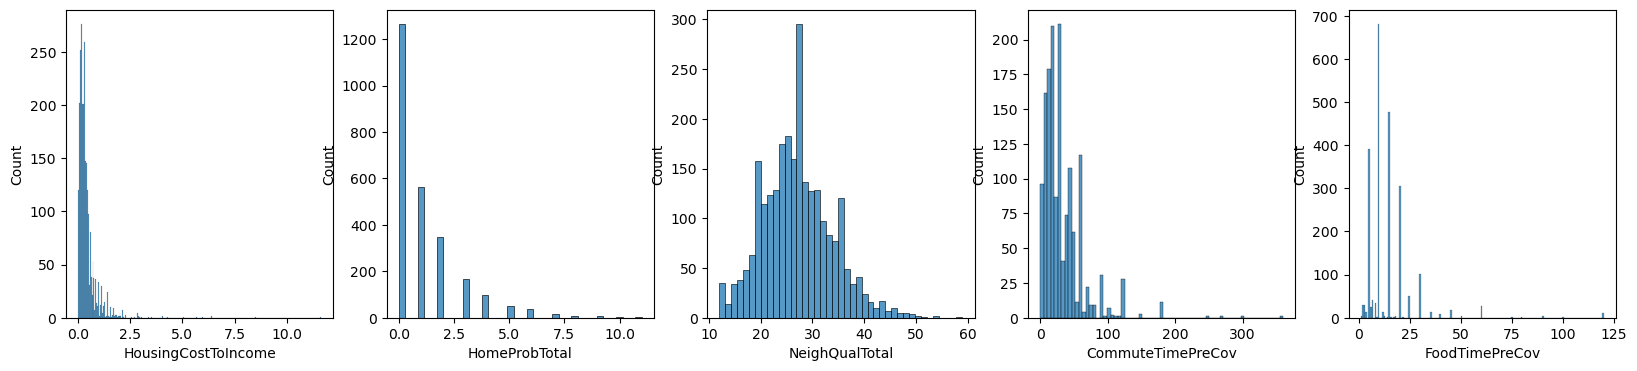

In [20]:
# plot for 'HousingCostToIncome'、'HomeProbTotal' 、 'NeighQualTotal' 、'TransportTime'
# plot in one figure 
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
sns.histplot(ori_df['HousingCostToIncome'], ax=axes[0])
sns.histplot(ori_df['HomeProbTotal'], ax=axes[1])
sns.histplot(ori_df['NeighQualTotal'], ax=axes[2])
sns.histplot(ori_df['CommuteTimePreCov'], ax=axes[3])
sns.histplot(ori_df['FoodTimePreCov'], ax=axes[4])
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Health', ylabel='Count'>

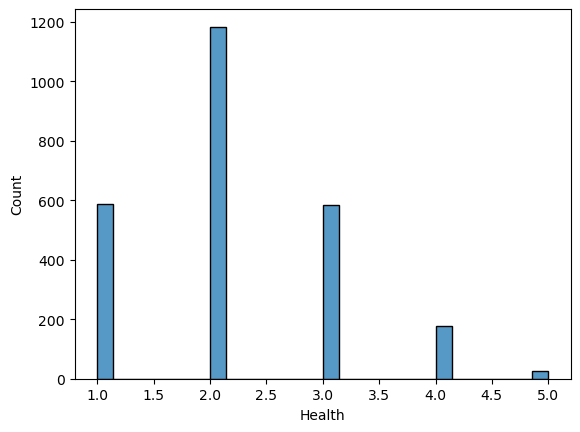

In [21]:
sns.histplot(ori_df['Health'])

In [22]:
# HousingCostToIncome、NeighQualTotal、CommuteTimePreCov、FoodTimePreCov呈现出右偏态分布特点，数据主要集中于左侧，说明大部分人的房屋支出占收入比例、邻里质量、通勤时间、食物准备时间都比较低，剥夺程度低？
# HomeProbTotal呈现出长尾分布特点，说明大多数人住房问题并不严重


## 2. Variable transformation 

#### Housing Cost to Income

In [23]:
ori_df['HousingCostToIncomeGroup'] = pd.cut(ori_df['HousingCostToIncome'], bins=[-1, 0.3, 0.4, 0.5,100], labels=[0,1,2,3])
ori_df['HousingCostToIncomeGroup'] = ori_df['HousingCostToIncomeGroup'].astype(float)
print(ori_df['HousingCostToIncomeGroup'].value_counts())

HousingCostToIncomeGroup
0.0    1422
3.0     578
1.0     320
2.0     244
Name: count, dtype: int64


#### HomeProbTotal

In [24]:
# Calculate the counts & percentage of each unique value in 'HomeProbTotal'
home_prob_total_counts = ori_df['HomeProbTotal'].value_counts()
home_prob_total_percentage = ori_df['HomeProbTotal'].value_counts(normalize=True) * 100

home_prob_total_summary = pd.DataFrame({
    'Count': home_prob_total_counts,
    'Percentage': home_prob_total_percentage
})

print(home_prob_total_summary)

               Count  Percentage
HomeProbTotal                   
0.0             1264   49.297972
1.0              565   22.035881
2.0              346   13.494540
3.0              169    6.591264
4.0               99    3.861154
5.0               51    1.989080
6.0               36    1.404056
7.0               14    0.546022
8.0                9    0.351014
9.0                7    0.273011
10.0               2    0.078003
11.0               2    0.078003


In [25]:
# 按HomeProbTotal为0,1-2,3-5,大于6进行分组
ori_df['HomeProbTotalGroup'] = pd.cut(ori_df['HomeProbTotal'], bins=[-1, 0, 2, 5, 100], labels=[0, 1, 2, 3])
ori_df['HomeProbTotalGroup'] = ori_df['HomeProbTotalGroup'].astype(float)
print(ori_df['HomeProbTotalGroup'].value_counts())

HomeProbTotalGroup
0.0    1264
1.0     911
2.0     319
3.0      70
Name: count, dtype: int64


#### NeighQualTotal

In [26]:
# Calculate the counts & percentage of each unique value in 'NeighQualTotalTotal'
neigh_quali_total_counts = ori_df['NeighQualTotal'].value_counts()
neigh_quali_total_percentage = ori_df['NeighQualTotal'].value_counts(normalize=True) * 100

neigh_quali_total_summary = pd.DataFrame({
    'Count': neigh_quali_total_counts,
    'Percentage': neigh_quali_total_percentage
})

neigh_quali_total_summary = neigh_quali_total_summary.sort_index()
print(neigh_quali_total_summary)

                Count  Percentage
NeighQualTotal                   
12.0               20    0.780031
13.0               15    0.585023
14.0               14    0.546022
15.0               34    1.326053
16.0               38    1.482059
17.0               48    1.872075
18.0               63    2.457098
19.0               81    3.159126
20.0               77    3.003120
21.0              114    4.446178
22.0              123    4.797192
23.0              128    4.992200
24.0              175    6.825273
25.0              183    7.137285
26.0              160    6.240250
27.0              149    5.811232
28.0              146    5.694228
29.0              136    5.304212
30.0              127    4.953198
31.0              128    4.992200
32.0               97    3.783151
33.0               83    3.237129
34.0               77    3.003120
35.0               56    2.184087
36.0               64    2.496100
37.0               49    1.911076
38.0               34    1.326053
39.0          

In [27]:
ori_df['NeighQualTotalGroup'] = pd.cut(ori_df['NeighQualTotal'], bins=[-1,20,30,40,100], labels=[0,1,2,3])
ori_df['NeighQualTotalGroup'] = ori_df['NeighQualTotalGroup'].astype(float)
print(ori_df['NeighQualTotalGroup'].value_counts())

NeighQualTotalGroup
1.0    1441
2.0     653
0.0     390
3.0      80
Name: count, dtype: int64


#### Transport Time

In [74]:
import ipywidgets as widgets
from IPython.display import display


def run_code_block_1():
    global ori_df, df
    print('Only use CommuteTime and remove null values')
    
    df = ori_df.copy()
    # Drop nan value for CommuteTimePreCov
    df = df.dropna(subset=['CommuteTimePreCov'])
    df['TransportTimeGroup'] = pd.cut(df['CommuteTimePreCov'], bins=[-1, 30, 40, 50, 500], labels=[0,1,2,3])
    df['TransportTimeGroup'] = df['TransportTimeGroup'].astype(float)
    print(df['TransportTimeGroup'].value_counts())

def run_code_block_2():
    global ori_df, df
    
    df = ori_df.copy()
    # Eliminate data where both CommuteTimePreCov and FoodTimePreCov are null values
    df = df.dropna(subset=['CommuteTimePreCov', 'FoodTimePreCov'], how='all')
    df['CommuteTimeGroup'] = pd.cut(df['CommuteTimePreCov'], bins=[-1, 30, 40, 50, 500], labels=[0,1,2,3])
    df['FoodTimeGroup'] = pd.cut(df['FoodTimePreCov'], bins=[-1, 5, 10, 15, 500], labels=[0,1,2,3])
    
    # If CommuteTimeGroup is empty, the value of FoodTimeGroup is used
    df['TransportTimeGroup'] = df['CommuteTimeGroup'].fillna(df['FoodTimeGroup'])
    df['TransportTimeGroup'] = df['TransportTimeGroup'].astype(float)
    print(df['TransportTimeGroup'].value_counts())

# Creating Buttons
button1 = widgets.Button(description="Commute")
button2 = widgets.Button(description="Commute & Food")

# Define the button click event
def on_button1_clicked(b):
    run_code_block_1()

def on_button2_clicked(b):
    run_code_block_2()

# Bind click event to buttons
button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)

# Show Buttons
display(button1)
display(button2)

Button(description='Commute', style=ButtonStyle())

Button(description='Commute & Food', style=ButtonStyle())

In [30]:
# HousingCostToIncomeGroup & TransportTimeGroup

df['Housing&TransportGroup'] = df['HousingCostToIncomeGroup'] + df['TransportTimeGroup']
print(df['Housing&TransportGroup'].value_counts())

Housing&TransportGroup
0.0    459
3.0    395
2.0    224
1.0    210
4.0     90
5.0     62
6.0     51
Name: count, dtype: int64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

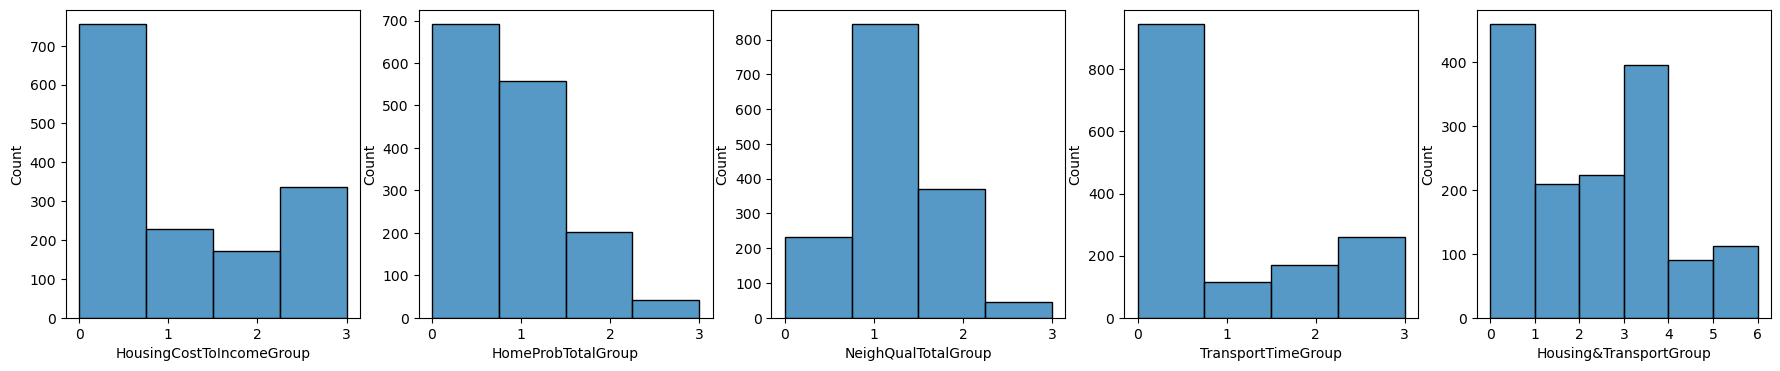

In [31]:
# plot for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure
fig, axes = plt.subplots(1, 5, figsize=(22, 4))
sns.histplot(df['HousingCostToIncomeGroup'], ax=axes[0],bins=4)
axes[0].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['HomeProbTotalGroup'], ax=axes[1],bins=4)
axes[1].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['NeighQualTotalGroup'], ax=axes[2],bins=4)
axes[2].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['TransportTimeGroup'], ax=axes[3],bins=4)
axes[3].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['Housing&TransportGroup'], ax=axes[4], bins=6)
axes[4].set_xticks(np.arange(0, 7, 1))
plt.show()


In [32]:
# 除了NeighQualTotalGroup，其他三个维度中，第0组的样本数量总是最多的，说明该三个维度中，大多数人的剥夺程度都不高
# NeighQualTotalGroup中，第1组的样本数量最多，说明大多数人的邻里质量一般？

## 3.Descriptive statistics

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='TransportTimeGroup', ylabel='Health'>

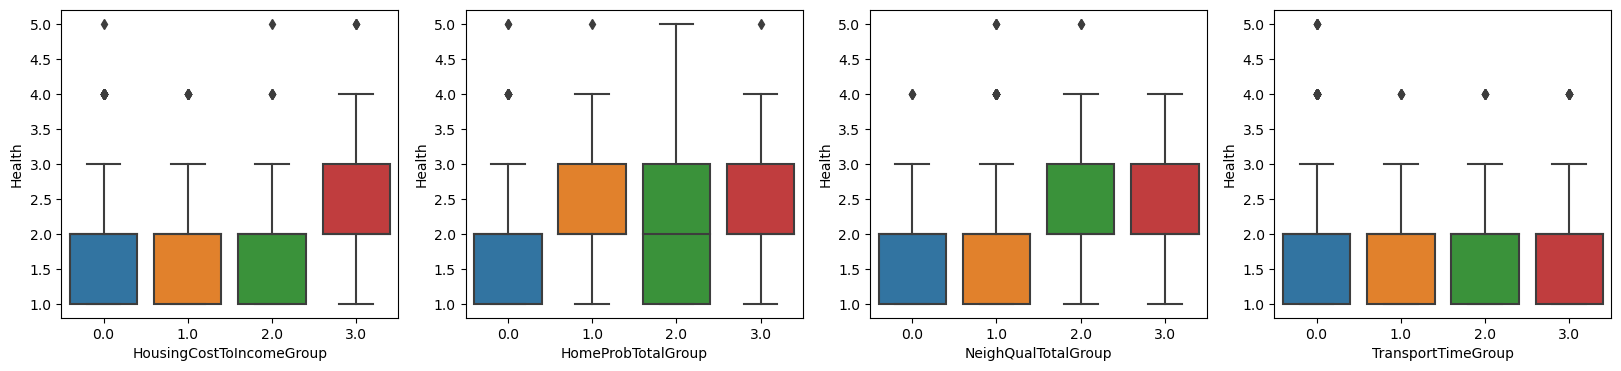

In [33]:
# plot boxplot for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
sns.boxplot(x='HousingCostToIncomeGroup', y='Health', data=df, ax=axes[0])
sns.boxplot(x='HomeProbTotalGroup', y='Health', data=df, ax=axes[1])
sns.boxplot(x='NeighQualTotalGroup', y='Health', data=df, ax=axes[2])
sns.boxplot(x='TransportTimeGroup', y='Health', data=df, ax=axes[3])

In [34]:
# TransportTimeGroup和Health之间的关系不明显，所有组的健康值中箱体的位置都差不多
# 其他三个维度中，剥夺程度越高，健康越差（虽然没有严格对应，但至少不同组的中位数、箱体和须是有差别的，剥夺程度越高，须包含健康值范围更高）

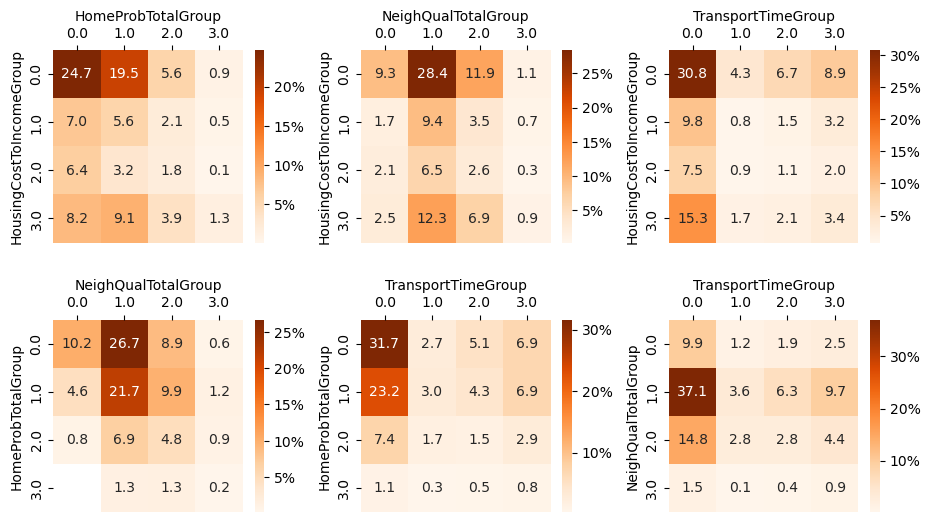

In [35]:
# plot heat map for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure

# Heat map of sample size for different deprivation combinations
column_list = ['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']

fig, axes = plt.subplots(2, 3, figsize=(11, 6))
idx = 0
for i in range(4):
    for j in range(i+1, 4):
        pivot_table = df.pivot_table(index=column_list[i], columns=column_list[j], values='Health', aggfunc='count')
        percent_table = pivot_table / pivot_table.sum().sum() * 100
        sns.heatmap(percent_table, ax=axes[(idx)//3, (idx)%3], annot=True, fmt='.1f', cmap='Oranges',cbar_kws={'format': '%.0f%%'})
        axes[(idx)//3, (idx)%3].xaxis.tick_top()
        axes[(idx)//3, (idx)%3].xaxis.set_label_position('top')
        idx += 1
        
plt.subplots_adjust(hspace=0.4,wspace=0.3)


In [36]:
# 似乎HousingCostToIncomeGroup占比不低的，只要有它的热力图，值为3.0的样本数量是较多的(明显多于1.0和2.0) 
# 带有TransportTimeGroup的热力图，0,1,2,3的占比要均匀一些（0肯定最多，但是1,2,3的占比差不多是0的1/3-1/2)
# 带有NeighQualTotalGroup的热力图，1.0的占比是最多的

# 以上均可从之前的直方图里也能看出

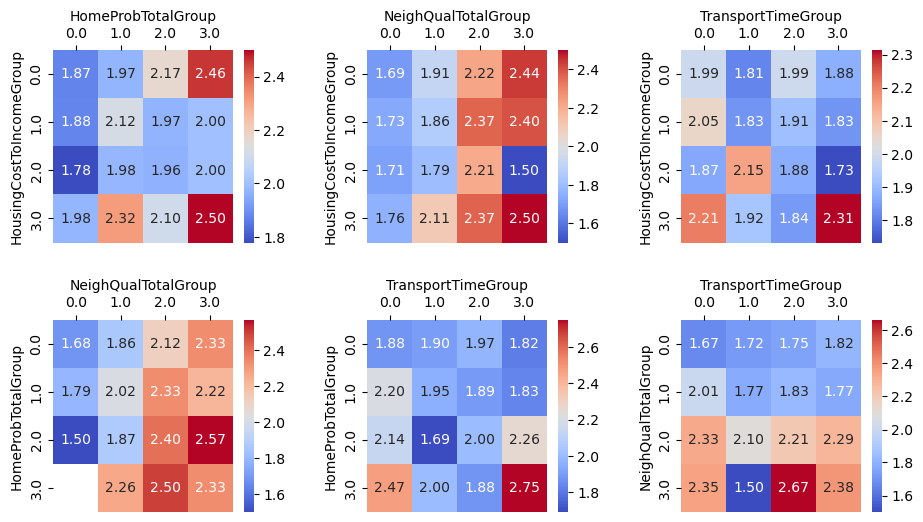

In [37]:
# plot heat map for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup' pairwise against 'Health'
# plot in one figure

fig, axes = plt.subplots(2, 3, figsize=(11, 6))
sns.heatmap(df.pivot_table(index='HousingCostToIncomeGroup', columns='HomeProbTotalGroup', values='Health', aggfunc='mean'), ax=axes[0, 0], annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HousingCostToIncomeGroup', columns='NeighQualTotalGroup', values='Health', aggfunc='mean'), ax=axes[0, 1],annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HousingCostToIncomeGroup', columns='TransportTimeGroup', values='Health', aggfunc='mean'), ax=axes[0, 2],annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HomeProbTotalGroup', columns='NeighQualTotalGroup', values='Health', aggfunc='mean'), ax=axes[1, 0],annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HomeProbTotalGroup', columns='TransportTimeGroup', values='Health', aggfunc='mean'), ax=axes[1, 1],annot=True, fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='NeighQualTotalGroup', columns='TransportTimeGroup', values='Health', aggfunc='mean'), ax=axes[1, 2],annot=True, fmt='.2f', cmap='coolwarm')
for i in range(2):
    for j in range(3):
        axes[i,j].xaxis.tick_top()
        axes[i,j].xaxis.set_label_position('top')
plt.subplots_adjust(hspace=0.4,wspace=0.4)


In [38]:
# 混合的低剥夺程度的样本，不一定健康状况最好
# 除了右下两个热力图，其他的热力图中，健康状况最好的，都不出现在剥夺程度最低的组合中

In [39]:
# HomeProb和NeighQual的相关性比较明显 0.242427
# NeighQual和Health的相关性也比较明显 0.241392

#### Co-correlation matrix

In [40]:
# calculate the correlation matrix
global df
corr = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup', 'Health']].corr()
# rename the columns of corr
corr.columns = ['HousingCost.', 'HomeProb', 'NeighQual', 'TransportTime', 'Health']
corr.index = ['HousingCost.', 'HomeProb', 'NeighQual', 'TransportTime', 'Health']

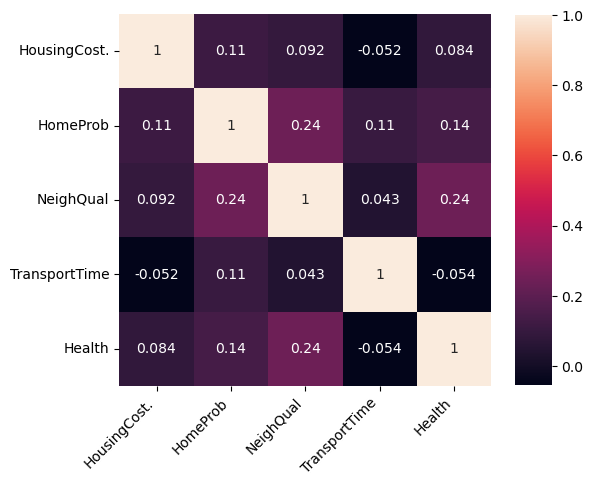

In [41]:
# plot map for correlation matrix
plt.figure(figsize=(6, 6))
ax = sns.heatmap(corr, annot=True, square=True, cbar_kws={'shrink': 0.8, 'aspect': 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


## Single Ordinal Logit analysis

In [42]:
# perform ols regression for 'HousingCostToIncome' and 'Health' without constant
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

y = df['Health']
X = df[['HousingCostToIncomeGroup']]
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())


Optimization terminated successfully.
         Current function value: 1.156832
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1724.8
Model:                   OrderedModel   AIC:                             3460.
Method:            Maximum Likelihood   BIC:                             3486.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:51                                         
No. Observations:                1491                                         
Df Residuals:                    1486                                         
Df Model:                           1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------

In [43]:
y = df['Health']
X = df[['HomeProbTotalGroup']]
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.152152
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1717.9
Model:                   OrderedModel   AIC:                             3446.
Method:            Maximum Likelihood   BIC:                             3472.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:51                                         
No. Observations:                1491                                         
Df Residuals:                    1486                                         
Df Model:                           1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

In [44]:
y = df['Health']
X = df[['NeighQualTotalGroup']]
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.129489
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1684.1
Model:                   OrderedModel   AIC:                             3378.
Method:            Maximum Likelihood   BIC:                             3405.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:51                                         
No. Observations:                1491                                         
Df Residuals:                    1486                                         
Df Model:                           1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [45]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = res.predict(X)
y_pred = y_pred.idxmax(axis=1)
cm = confusion_matrix(y, y_pred)
print(cm)

# calculate the accuracy and macro f1 score
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')
print('Accuracy:', accuracy)
print('Macro F1 Score:', f1)

[[411   0   0   0   0]
 [746   0   0   0   0]
 [268   0   0   0   0]
 [ 61   0   0   0   0]
 [  5   0   0   0   0]]
Accuracy: 0.27565392354124746
Macro F1 Score: 0.08643533123028391


In [46]:
y = df['Health']
X = df[['TransportTimeGroup']]
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.158741
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1727.7
Model:                   OrderedModel   AIC:                             3465.
Method:            Maximum Likelihood   BIC:                             3492.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:51                                         
No. Observations:                1491                                         
Df Residuals:                    1486                                         
Df Model:                           1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

In [47]:
y = df['Health']
X = df[['Housing&TransportGroup']]
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.159783
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1729.2
Model:                   OrderedModel   AIC:                             3468.
Method:            Maximum Likelihood   BIC:                             3495.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:51                                         
No. Observations:                1491                                         
Df Residuals:                    1486                                         
Df Model:                           1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

## Multiple Ordinal Logit regression

In [48]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

# print confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = res.predict(X)
y_pred = y_pred.idxmax(axis=1)
cm = confusion_matrix(y, y_pred)
print(cm)

# calculate the accuracy and macro f1 score
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')
print('Accuracy:', accuracy)
print('Macro F1 Score:', f1)


Optimization terminated successfully.
         Current function value: 1.123408
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1675.0
Model:                   OrderedModel   AIC:                             3366.
Method:            Maximum Likelihood   BIC:                             3408.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:51                                         
No. Observations:                1491                                         
Df Residuals:                    1483                                         
Df Model:                           4                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------

### Interaction term

#### all+ two-two interactions

In [49]:
y = df['Health']
X = df[['HousingCostToIncome', 'HomeProbTotal', 'NeighQualTotal', 'CommuteTimePreCov']]
interactions = df['NeighQualTotal'] * df['CommuteTimePreCov']
X['NeighQual*CommuteTime'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

# print confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = res.predict(X)
y_pred = y_pred.idxmax(axis=1)
cm = confusion_matrix(y, y_pred)
print(cm)

# calculate the accuracy and macro f1 score
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')
print('Accuracy:', accuracy)
print('Macro F1 Score:', f1)

Optimization terminated successfully.
         Current function value: 1.122763
         Iterations: 33
         Function evaluations: 40
         Gradient evaluations: 40
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1674.0
Model:                   OrderedModel   AIC:                             3366.
Method:            Maximum Likelihood   BIC:                             3414.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:51                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

/tmp/ipykernel_99/2021668567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NeighQual*CommuteTime'] = interactions


In [50]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HousingCostToIncomeGroup'] * df['HomeProbTotalGroup']
X['HousingCostToIncomeGroup:HomeProbTotalGroup'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

# print confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = res.predict(X)
y_pred = y_pred.idxmax(axis=1)
cm = confusion_matrix(y, y_pred)
print(cm)

# calculate the accuracy and macro f1 score
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')
print('Accuracy:', accuracy)
print('Macro F1 Score:', f1)

/tmp/ipykernel_99/3169515366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HousingCostToIncomeGroup:HomeProbTotalGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123343
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1674.9
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3416.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----

In [51]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HousingCostToIncomeGroup'] * df['NeighQualTotalGroup']
X['HousingCostToIncomeGroup:NeighQualTotalGroup'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

/tmp/ipykernel_99/66424330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HousingCostToIncomeGroup:NeighQualTotalGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123408
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1675.0
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3416.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----

In [52]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HousingCostToIncomeGroup'] * df['TransportTimeGroup']
X['HousingCostToIncomeGroup:TransportTimeGroup'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

/tmp/ipykernel_99/586652284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HousingCostToIncomeGroup:TransportTimeGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123379
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1675.0
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3416.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----

In [53]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HomeProbTotalGroup'] * df['NeighQualTotalGroup']
X['HomeProbTotalGroup:NeighQualTotalGroup'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

/tmp/ipykernel_99/1820592942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HomeProbTotalGroup:NeighQualTotalGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123314
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1674.9
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3415.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------

In [54]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HomeProbTotalGroup'] * df['TransportTimeGroup']
X['HomeProbTotalGroup:TransportTimeGroup'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

/tmp/ipykernel_99/3783774956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HomeProbTotalGroup:TransportTimeGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123353
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1674.9
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3416.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------

In [55]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['NeighQualTotalGroup'] * df['TransportTimeGroup'] 
X['NeighQualTotalGroup:TransportTimeGroup'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

/tmp/ipykernel_99/1822100917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NeighQualTotalGroup:TransportTimeGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123124
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1674.6
Model:                   OrderedModel   AIC:                             3367.
Method:            Maximum Likelihood   BIC:                             3415.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------

#### all+ four interactions

In [56]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HousingCostToIncomeGroup'] * df['HomeProbTotalGroup'] * df['NeighQualTotalGroup'] * df['TransportTimeGroup']
X['HousingCostToIncomeGroup:HomeProbTotalGroup:NeighQualTotalGroup:TransportTimeGroup'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

/tmp/ipykernel_99/3014542758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HousingCostToIncomeGroup:HomeProbTotalGroup:NeighQualTotalGroup:TransportTimeGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123381
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1675.0
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3416.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                                                                         coef    std err          z  

#### All+ three interactions

In [57]:
# 全变量 + 只有三个变量的交互项

y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HousingCostToIncomeGroup'] * df['HomeProbTotalGroup'] * df['NeighQualTotalGroup']
X['HousingCostToIncomeGroup:HomeProbTotalGroup:NeighQualTotalGroup:'] = interactions

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

/tmp/ipykernel_99/1105257979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HousingCostToIncomeGroup:HomeProbTotalGroup:NeighQualTotalGroup:'] = interactions


Optimization terminated successfully.
         Current function value: 1.123407
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1675.0
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3416.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:52                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                                                       coef    std err          z      P>|z|      [0.

## Logistic Regression


In [58]:
print(df['HousingCostToIncomeGroup'].isna().sum())

0


In [59]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [60]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]
interactions = df['HousingCostToIncomeGroup'] * df['HomeProbTotalGroup']
# 添加常数项
# X = sm.add_constant(X)

X['HousingCostToIncomeGroup:HomeProbTotalGroup'] = interactions
# 拟合模型
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')

# 输出模型摘要
print(res.summary())

/tmp/ipykernel_99/4101750534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HousingCostToIncomeGroup:HomeProbTotalGroup'] = interactions


Optimization terminated successfully.
         Current function value: 1.123343
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1674.9
Model:                   OrderedModel   AIC:                             3368.
Method:            Maximum Likelihood   BIC:                             3416.
Date:                Wed, 17 Jul 2024                                         
Time:                        20:28:53                                         
No. Observations:                1491                                         
Df Residuals:                    1482                                         
Df Model:                           5                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----

In [61]:
# Logistic regression results, the accuracy and F1 value of health value 2 classification are significantly higher than those of 5 classification

In [62]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import f1_score

df['Health'].fillna(df['Health'].median(), inplace=True) # 1个空值

# Define and fit a multi-class logistic regression model
multinomial_logit_model = sm.MNLogit(df['Health'], df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']])
multinomial_logit_result = multinomial_logit_model.fit()

# Print confusion matrix
print(multinomial_logit_result.pred_table())    

# Calculate accuracy
accuracy = np.diag(multinomial_logit_result.pred_table()).sum() / df.shape[0]
print('Accuracy:', accuracy)

# Calculate micro F1 and macro F1
y_true = df['Health']
y_pred = np.argmax(multinomial_logit_result.predict(), axis=1)
micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
print('Micro F1:', micro_f1)
print('Macro F1:', macro_f1)


         Current function value: 1.237324
         Iterations: 35
[[ 57. 345.   0.   9.   0.]
 [ 65. 670.   0.  11.   0.]
 [ 15. 249.   0.   4.   0.]
 [  1.  60.   0.   0.   0.]
 [  0.   5.   0.   0.   0.]]
Accuracy: 0.4875922199865862
Micro F1: 0.2340710932260228
Macro F1: 0.07065816406865061


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
# transfer Health into binary value with median

df['Health_bin'] = df['Health'].apply(lambda x: 1 if x > df['Health'].median() else 0)

In [64]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import f1_score

# Define and fit a multi-class logistic regression model
multinomial_logit_model = sm.MNLogit(df['Health_bin'], df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']])
multinomial_logit_result = multinomial_logit_model.fit()

# Print confusion matrix
print(multinomial_logit_result.pred_table())    

# Calculate accuracy
accuracy = np.diag(multinomial_logit_result.pred_table()).sum() / df.shape[0]
print('Accuracy:', accuracy)

# Calculate micro F1 and macro F1
y_true = df['Health_bin']
y_pred = np.argmax(multinomial_logit_result.predict(), axis=1)
micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
print('Micro F1:', micro_f1)
print('Macro F1:', macro_f1)


Optimization terminated successfully.
         Current function value: 0.594953
         Iterations 5
[[1157.    0.]
 [ 334.    0.]]
Accuracy: 0.7759892689470155
Micro F1: 0.7759892689470155
Macro F1: 0.43693353474320246


## Threshold analysis

In [65]:
# calculate the number of deprivations 
df['DeprivationNum'] = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']].sum(axis=1)

In [66]:
# group the number of deprivations into 5 groups
df['DeprivationNumGroup'] = pd.cut(df['DeprivationNum'], bins=[-1, 2, 5, 100], labels=[0,1,2])
# df['DeprivationNumGroup'] = df['DeprivationNumGroup'].astype(float)
print(df['DeprivationNumGroup'].value_counts())

DeprivationNumGroup
1    689
0    486
2    316
Name: count, dtype: int64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


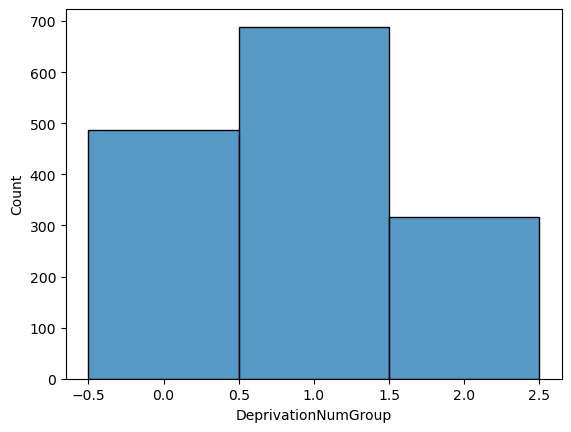

In [67]:
# plot for 'DeprivationNumGroup'
sns.histplot(df['DeprivationNumGroup'])
plt.show()

In [75]:
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
# compare health outcomes across these groups using ANOVA or Chi-square tests.
# ANOVA
model = ols('Health ~ 0 + DeprivationNumGroup', data=df).fit()
print(model.summary())
print()

NameError: name 'ols' is not defined

In [ ]:
# 进行ANOVA分析
anova_results = anova_lm(model, typ=2)

# 输出结果
print(anova_results)

In [ ]:
import scipy.stats as stats

f_value, p_value = stats.f_oneway(df[df['DeprivationNumGroup']==0]['Health'], df[df['DeprivationNumGroup']==1]['Health'], df[df['DeprivationNumGroup']==2]['Health'])

print("F值:", f_value)
print("P值:", p_value)

In [ ]:

# Chi-square tests
contingency_table = pd.crosstab(df['Health'], df['DeprivationNumGroup'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square:', chi2)
print('P-value:', p)

In [ ]:
# ANOVA和卡方检验的P值都小于0.05，说明不同剥夺程度组的健康值有显著差异